# Comparing calculated S6/ST to measured (Muth and Wallace, 2021)
- This notebook compares measured S6/ST values to those measured using XANES for Jugo, Nash and Oneill-Mavrogenes 2022

In [1]:
#!pip install PySulfSat --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.14'

## Load data (measured MI comps)

In [2]:
df_out=ss.import_data('Muth_data_Merged.xlsx', sheet_name='Sheet1')

df_out_trim=df_out.iloc[:, 0:12]
df_out_trim['Sample_ID_Liq']=df_out['MI_Name']
df_out_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32
1,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33
2,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34
3,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43
4,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44


In [3]:
df_err=ss.import_data_noise('Muth_data_Merged.xlsx', sheet_name='Sheet1')
df_err_trim=df_err.iloc[:, 0:12]
df_err_trim['Sample_ID_Liq']=df_err['MI_Name']
df_err_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,Sample_ID_Liq
0,0.678665,0.096405,0.404524,0.303896,0.019579,0.520599,0.047518,0.264134,0.030958,0.023520,0.112563,0.018260,BBL-5-32
1,0.825791,0.026556,0.115552,0.420127,0.007783,0.152587,0.172061,0.212874,0.096533,0.030083,0.113527,0.014959,BBL-5-33
2,1.876183,0.018804,0.083276,0.194047,0.018462,0.149600,0.136053,0.187045,0.020508,0.010884,0.025529,0.017848,BBL-5-34
3,0.314276,0.036322,0.313526,0.424967,0.004634,0.043281,0.065173,0.272982,0.036137,0.017175,0.001549,0.009052,BBL-5-43
4,0.386098,0.036339,0.161871,0.387210,0.001353,0.057336,0.127017,0.097441,0.003957,0.005722,0.079326,0.010618,BBL-5-44


## Lets convert with Berry et al. (2018) following O'Neill and Mavrogenes (2022)
[Fe3+/ΣFe]Berry = ([Fe3+/ΣFe]Zhang - 0.048] / (1-0.048)

In [4]:
df_out_trim['Fe3Fet_Berry']=(df_out_trim['Fe3Fet_Liq']-0.048)/(1-0.048)
df_err_trim['Fe3Fet_Berry_Err']=df_err_trim['Fe3Fet_Liq_Err']
df_out_trim['Fe3Fet_Berry'].head()

0    0.116273
1    0.174062
2    0.140683
3    0.132187
4    0.098964
Name: Fe3Fet_Berry, dtype: float64

In [5]:
df_out_trim['Fe3Fet_Liq'].head()

0    0.158692
1    0.213707
2    0.181930
3    0.173842
4    0.142214
Name: Fe3Fet_Liq, dtype: float64

## Lets calculate a temperature 
- Using their H2O contents. 

In [6]:
import Thermobar as pt
Temp_3=pt.calculate_liq_only_temp(liq_comps=df_out, equationT='T_Put2008_eq22_BeattDMg', P=3, H2O_Liq=df_out['H2O_Liq'])
Temp_3.head()

0    1407.340081
1    1427.006146
2    1426.318219
3    1459.082125
4    1440.880509
dtype: float64

## Lets perform calcs straight up first

In [7]:
calc_GivenFe3_Rep=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out_trim['Fe3Fet_Liq'])

calc_GivenFe3_Rep.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.213088,-3.316331,14.165511,-19.356183,-1.306411,0.938474,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32,0.116273,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.282959,0.061714
1,0.856566,-3.054445,13.864131,-18.817435,1.787057,1.604158,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33,0.174062,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.371922,0.060013
2,0.551477,-3.163752,13.828337,-18.836028,0.206641,1.249443,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34,0.140683,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-7.735105,0.058840
3,0.555898,-2.805222,13.380534,-17.970140,0.224530,1.221990,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43,0.132187,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.368103,0.061614
4,0.162507,-3.215526,13.566557,-18.446271,-1.639692,0.801218,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44,0.098964,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.005795,0.053345


In [8]:
calc_GivenFe3_Berry=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out_trim['Fe3Fet_Berry'])

calc_GivenFe3_Berry.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.015495,-3.316331,14.201996,-19.356183,-4.151629,0.312720,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32,0.116273,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.908713,0.064825
1,0.446942,-3.054445,13.899122,-18.817435,-0.213034,1.162246,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33,0.174062,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.813834,0.063039
2,0.098903,-3.163752,13.862660,-18.836028,-2.209475,0.717337,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34,0.140683,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-8.267211,0.061807
3,0.089050,-2.805222,13.415669,-17.970140,-2.325286,0.660675,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43,0.132187,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.929417,0.064720
4,0.007370,-3.215526,13.597361,-18.446271,-4.903005,0.085910,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44,0.098964,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.721103,0.056034


Text(0, 0.5, 'Calc S6/St')

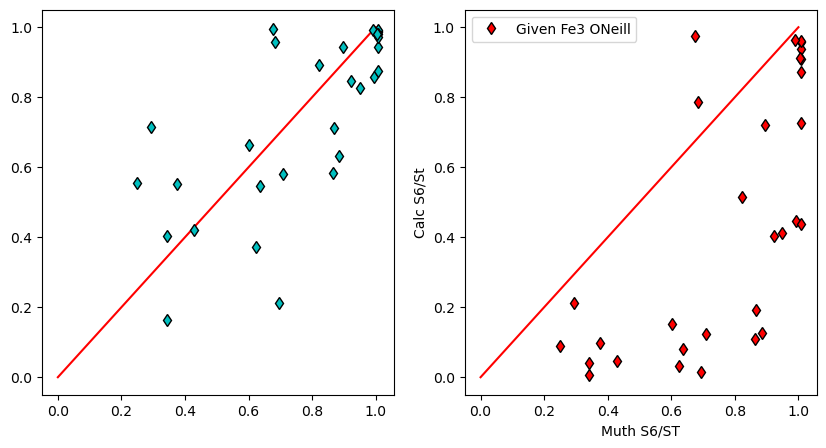

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([0, 1], [0, 1], '-r')
ax2.plot([0, 1], [0, 1], '-r')

ax1.plot(df_out['S6+/∑S'],
         calc_GivenFe3_Rep['S6St_Liq'],
         'dk', mfc='c', label='Given Fe3 ONeill')

ax2.plot(df_out['S6+/∑S'],
         calc_GivenFe3_Berry['S6St_Liq'],
         'dk', mfc='r', label='Given Fe3 ONeill')


plt.legend()
plt.xlabel('Muth S6/ST')
plt.ylabel('Calc S6/St')

In [10]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3_Berry['S6St_Liq'], xy=False)

{'R2': '0.46',
 'RMSE': '0.42',
 'RMSE_num': 0.42,
 'P_val': '0.000',
 'Median': '-0.30',
 'Mean': '-0.32',
 'Int': array([-0.31040758]),
 'Grad': array([0.98574948])}

In [11]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3_Rep['S6St_Liq'], xy=False)

{'R2': '0.51',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.03',
 'Int': array([0.2016873]),
 'Grad': array([0.70240837])}

## Now lets account for error

In [13]:
N_dups=5000
# Lets set temp error at +-50 K
df_out_trim['T_K_Liq']=Temp_3
df_err_trim['T_K_Liq_Err']=50

df_noisy_abs=ss.add_noise_2_dataframes(df_values=df_out_trim, df_err=df_err_trim, 
        error_type="Abs", error_dist="normal", N_dups=N_dups, sample_name_col='Sample_ID_Liq')
df_noisy_abs.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq
0,49.221660,1.186776,16.976647,9.285514,0.145071,5.784657,9.795971,3.651862,0.650616,0.274859,1.195474,0.165259,0.121490,1413.369571,BBL-5-32
1,49.990410,1.324087,16.975321,9.740215,0.201788,5.061127,9.827808,3.882700,0.613344,0.270632,1.355111,0.181564,0.091073,1332.405881,BBL-5-32
2,51.362511,1.203362,17.015278,8.748713,0.152935,4.834119,9.782070,3.438581,0.589642,0.279656,1.110572,0.173447,0.105043,1551.402631,BBL-5-32
3,50.466459,1.387958,16.698394,9.347428,0.155292,6.014562,9.791713,3.493070,0.633807,0.321527,1.429387,0.145935,0.109965,1411.625467,BBL-5-32
4,49.679422,1.266359,16.945841,9.235145,0.181569,4.850257,9.805840,3.585036,0.608055,0.291008,1.423410,0.172551,0.112771,1505.983726,BBL-5-32


In [14]:
df_err_trim

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,Sample_ID_Liq,Fe3Fet_Berry_Err,T_K_Liq_Err
0,0.678665,0.096405,0.404524,0.303896,0.019579,0.520599,0.047518,0.264134,0.030958,0.023520,0.112563,0.018260,BBL-5-32,0.018260,50
1,0.825791,0.026556,0.115552,0.420127,0.007783,0.152587,0.172061,0.212874,0.096533,0.030083,0.113527,0.014959,BBL-5-33,0.014959,50
2,1.876183,0.018804,0.083276,0.194047,0.018462,0.149600,0.136053,0.187045,0.020508,0.010884,0.025529,0.017848,BBL-5-34,0.017848,50
3,0.314276,0.036322,0.313526,0.424967,0.004634,0.043281,0.065173,0.272982,0.036137,0.017175,0.001549,0.009052,BBL-5-43,0.009052,50
4,0.386098,0.036339,0.161871,0.387210,0.001353,0.057336,0.127017,0.097441,0.003957,0.005722,0.079326,0.010618,BBL-5-44,0.010618,50
5,0.365292,0.001359,0.110953,0.183394,0.002060,0.004774,0.059742,0.288414,0.024358,0.002606,0.004050,0.027446,BBL-5-46,0.027446,50
6,0.272641,0.024643,0.499164,0.183302,0.003556,0.084409,0.017497,0.226543,0.019825,0.016184,0.062304,0.016916,BBL-5-47,0.016916,50
7,0.266759,0.026344,0.087834,0.207893,0.002936,0.204760,0.083043,0.194618,0.020954,0.006466,0.012970,0.016055,BBL-5-49,0.016055,50
8,0.450516,0.007734,0.216342,0.364702,0.002819,0.061478,0.029112,0.144759,0.035853,0.014174,0.085338,0.026358,BORG-1-31,0.026358,50
9,1.561881,0.031715,0.058821,0.399869,0.001470,0.234163,0.011169,0.124447,0.066206,0.024311,0.000000,0.011731,BORG-1-35,0.011731,50


## Now put all this synthetic simulated data into the S6 calculation

In [15]:
noisy_ONeill_Fe_S6St_Rep=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St_Rep.head()

noisy_ONeill_Fe_S6St_Berry=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Berry'],
                                      T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St_Berry.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.023962,-3.226288,14.191855,-19.189399,-3.707042,0.391283,49.221660,1.186776,16.976647,9.285514,0.145071,5.784657,9.795971,3.651862,0.650616,0.274859,1.195474,0.165259,0.121490,1413.369571,BBL-5-32,0.539724,0.094559,0.001347,0.085149,0.115090,0.109697,0.038819,0.004551,0.009788,0.001276,0.467560,0.081916,0.001167,0.073764,0.099702,0.190060,0.067258,0.007884,0.008480,0.002210,0.526174,0.570875,-8.754201,0.064802
1,0.001036,-3.962805,15.556862,-21.555997,-6.870958,-0.188782,49.990410,1.324087,16.975321,9.740215,0.201788,5.061127,9.827808,3.882700,0.613344,0.270632,1.355111,0.181564,0.091073,1332.405881,BBL-5-32,0.545443,0.082322,0.001865,0.088877,0.114893,0.109146,0.041069,0.004269,0.010867,0.001250,0.471945,0.071230,0.001614,0.076901,0.099411,0.188877,0.071070,0.007387,0.009403,0.002163,0.480850,0.530891,-10.411477,0.069897
2,0.013510,-2.252383,11.901209,-15.728649,-4.290746,0.147670,51.362511,1.203362,17.015278,8.748713,0.152935,4.834119,9.782070,3.438581,0.589642,0.279656,1.110572,0.173447,0.105043,1551.402631,BBL-5-32,0.562840,0.078970,0.001419,0.080175,0.114853,0.109876,0.036529,0.004121,0.009919,0.001297,0.488651,0.068561,0.001232,0.069607,0.099714,0.190787,0.063428,0.007156,0.008611,0.002252,0.496207,0.543718,-7.420570,0.062295
3,0.010929,-3.279881,14.090030,-19.237496,-4.505358,0.239862,50.466459,1.387958,16.698394,9.347428,0.155292,6.014562,9.791713,3.493070,0.633807,0.321527,1.429387,0.145935,0.109965,1411.625467,BBL-5-32,0.544502,0.096741,0.001419,0.084342,0.113195,0.106169,0.036536,0.004362,0.011264,0.001468,0.474084,0.084230,0.001236,0.073435,0.098556,0.184878,0.063622,0.007596,0.009808,0.002557,0.534226,0.573187,-8.927524,0.065359
4,0.017440,-2.454790,12.686161,-16.796745,-4.031422,0.244708,49.679422,1.266359,16.945841,9.235145,0.181569,4.850257,9.805840,3.585036,0.608055,0.291008,1.423410,0.172551,0.112771,1505.983726,BBL-5-32,0.550657,0.080145,0.001705,0.085606,0.116456,0.110686,0.038523,0.004299,0.010558,0.001365,0.476811,0.069397,0.001476,0.074126,0.100839,0.191686,0.066713,0.007445,0.009142,0.002365,0.483519,0.530826,-7.810595,0.065767


## Now calculate the error bar for each row

In [19]:
Stats_Fe_S6_Rep=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St_Rep['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_Fe_S6_Rep.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.254950,0.215638,0.180117,0.905391,0.001725
1,BBL-5-33,5000,0.820506,0.855633,0.128070,0.988016,0.096211
2,BBL-5-34,5000,0.532002,0.543743,0.212242,0.965591,0.016815
3,BBL-5-43,5000,0.542014,0.555737,0.214707,0.981216,0.026644
4,BBL-5-44,5000,0.207999,0.160662,0.170159,0.881397,0.000141


In [20]:
Stats_Fe_S6_Berry=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St_Berry['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_Fe_S6_Berry.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.031770,0.015473,0.046489,0.642037,9.926852e-06
1,BBL-5-33,5000,0.449445,0.443940,0.212362,0.949757,1.100763e-02
2,BBL-5-34,5000,0.143123,0.099256,0.134041,0.813120,4.726367e-04
3,BBL-5-43,5000,0.131442,0.086405,0.129857,0.839532,1.181191e-04
4,BBL-5-44,5000,0.018558,0.007207,0.031935,0.403228,7.200104e-08


## Lets do the same using Nash
- If you just want to vary 1 thing, you can do it this way
- First, take your dataframe, and duplicate it N times, all the columns will be the same, but will now be Sample1-Sample1-Sample1, Sample2-Sample2-Sample2

In [21]:

Dupdf=ss.duplicate_dataframe(df=df_out_trim, N_dup=N_dups)
Dupdf.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,T_K_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
1,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
2,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
3,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
4,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081


### Now you can make the errors for one column at a time if you prefer

- E.g. adding a temp error of +- 1sigma = 50 K

In [22]:
Temp_Err=ss.add_noise_series(df_out_trim['T_K_Liq'], error_var=50,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this to the dataframe
Dupdf['T_K_MC']=Temp_Err

- And adding a Fe3Fet_Liq error from their spreadsheet

In [23]:
Fe3_Err=ss.add_noise_series(df_out_trim['Fe3Fet_Liq'], error_var=df_err_trim['Fe3Fet_Liq_Err'],
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
Dupdf['Fe3Fet_Liq_MC']=Fe3_Err

## Now put these uncertainties into Nash

In [24]:
noisy_Nash_S6St=ss.calculate_S6St_Nash2019(Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
                                          T_K=Dupdf['T_K_MC'])
noisy_Nash_S6St.head()

0    0.002667
1    0.348563
2    0.667514
3    0.041991
4    0.020960
dtype: float64

In [25]:
Stats_Nash_S6=pt.av_noise_samples_series(calc=noisy_Nash_S6St, sampleID=Dupdf['Sample_ID_Liq'])
Stats_Nash_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.194820,0.130684,0.185468,0.958702,0.000230
1,BBL-5-33,5000,0.750099,0.806716,0.195899,0.995125,0.046666
2,BBL-5-34,5000,0.462184,0.455213,0.247813,0.984545,0.003851
3,BBL-5-43,5000,0.479570,0.476244,0.250585,0.994640,0.003757
4,BBL-5-44,5000,0.150048,0.090265,0.162462,0.941667,0.000073


## And Jugo
- First, need to calculate QFM relative to frost from the Fe3Fet ratio

In [26]:
Buffer=pt.convert_fe_partition_to_fo2(liq_comps=Dupdf,  T_K=Dupdf['T_K_MC'], P_kbar=5,  
        model="Kress1991", Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
 renorm=False)
Buffer.head()

overwriting Fe3Fet_Liq to that specified in the function input
(150000,)


,DeltaQFM_Frost1991,DeltaNNO_Frost1991,fo2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,T_K_Liq,T_K_MC,Fe3Fet_Liq_MC,FeO_Liq,Fe2O3_Liq
0,-0.691117,-1.198496,1.784955e-11,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.124971,BBL-5-32,0.116273,1407.340081,1306.198176,0.124971,8.077328,1.281776
1,0.650395,0.139949,1.210794e-09,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.203095,BBL-5-32,0.116273,1407.340081,1341.163525,0.203095,7.356172,2.083059
2,0.702605,0.185261,1.728070e-08,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.198391,BBL-5-32,0.116273,1407.340081,1427.113202,0.198391,7.399593,2.034813
3,-0.221367,-0.735917,7.364201e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.142536,BBL-5-32,0.116273,1407.340081,1391.006675,0.142536,7.915183,1.461936
4,-0.395579,-0.909608,4.069965e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.133635,BBL-5-32,0.116273,1407.340081,1384.469502,0.133635,7.997352,1.370637


In [27]:
noisy_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Buffer['DeltaQFM_Frost1991'])
noisy_Jugo.head()

0    0.000329
1    0.137022
2    0.168008
3    0.002858
4    0.001283
Name: DeltaQFM_Frost1991, dtype: float64

In [28]:
Stats_Jugo_S6=pt.av_noise_samples_series(calc=noisy_Jugo, sampleID=Dupdf['Sample_ID_Liq'])
Stats_Jugo_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.023617,0.010477,0.037406,0.552492,0.000009
1,BBL-5-33,5000,0.402760,0.381256,0.218939,0.956614,0.016277
2,BBL-5-34,5000,0.087443,0.054498,0.096867,0.774221,0.000106
3,BBL-5-43,5000,0.096274,0.060261,0.104311,0.812014,0.000079
4,BBL-5-44,5000,0.012267,0.004784,0.023445,0.530938,0.000003


In [29]:
S_types=ss.convert_S_types(S_wt=df_out['S'])
S_types.head()

,S_wt,S_ppm,SO2_wt,SO2_ppm,SO3_wt,SO3_ppm,SO4_wt,SO4_ppm
0,0.133403,1334.034269,0.266528,2665.281066,0.333090,3330.904464,0.399653,3996.527863
1,0.150144,1501.439419,0.299974,2999.741572,0.374889,3748.892648,0.449804,4498.043724
2,0.124034,1240.340506,0.247809,2478.089313,0.309696,3096.963717,0.371584,3715.838121
3,0.108941,1089.410000,0.217654,2176.543672,0.272011,2720.110507,0.326368,3263.677343
4,0.093533,935.330000,0.186871,1868.705623,0.233539,2335.393434,0.280208,2802.081245


## Pic one sample

In [30]:
sam=df_out['MI_Name'].loc[df_out['S6+/∑S'].between(0.4, 0.45)].iloc[0]
sam

'BBL-5-46'

In [31]:
Dupdf

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,T_K_Liq,T_K_MC,Fe3Fet_Liq_MC
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081,1306.198176,0.124971
1,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081,1341.163525,0.203095
2,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081,1427.113202,0.198391
3,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081,1391.006675,0.142536
4,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081,1384.469502,0.133635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,47.719994,1.490935,18.518857,8.716081,0.145032,5.919018,10.058408,3.568053,1.120077,0.330638,1.924331,0.191239,MM-L17-BRVB-2-7,0.150461,1403.706698,1363.389043,0.197001
149996,47.719994,1.490935,18.518857,8.716081,0.145032,5.919018,10.058408,3.568053,1.120077,0.330638,1.924331,0.191239,MM-L17-BRVB-2-7,0.150461,1403.706698,1334.078874,0.210814
149997,47.719994,1.490935,18.518857,8.716081,0.145032,5.919018,10.058408,3.568053,1.120077,0.330638,1.924331,0.191239,MM-L17-BRVB-2-7,0.150461,1403.706698,1447.046970,0.153082
149998,47.719994,1.490935,18.518857,8.716081,0.145032,5.919018,10.058408,3.568053,1.120077,0.330638,1.924331,0.191239,MM-L17-BRVB-2-7,0.150461,1403.706698,1350.994577,0.195591


## Show input MC

In [32]:
df_noisy_abs

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq
0,49.221660,1.186776,16.976647,9.285514,0.145071,5.784657,9.795971,3.651862,0.650616,0.274859,1.195474,0.165259,0.121490,1413.369571,BBL-5-32
1,49.990410,1.324087,16.975321,9.740215,0.201788,5.061127,9.827808,3.882700,0.613344,0.270632,1.355111,0.181564,0.091073,1332.405881,BBL-5-32
2,51.362511,1.203362,17.015278,8.748713,0.152935,4.834119,9.782070,3.438581,0.589642,0.279656,1.110572,0.173447,0.105043,1551.402631,BBL-5-32
3,50.466459,1.387958,16.698394,9.347428,0.155292,6.014562,9.791713,3.493070,0.633807,0.321527,1.429387,0.145935,0.109965,1411.625467,BBL-5-32
4,49.679422,1.266359,16.945841,9.235145,0.181569,4.850257,9.805840,3.585036,0.608055,0.291008,1.423410,0.172551,0.112771,1505.983726,BBL-5-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,47.214155,1.456560,18.080065,9.019220,0.148000,4.699432,10.109232,3.207497,1.093566,0.344177,1.776874,0.168507,0.165138,1419.236872,MM-L17-BRVB-2-7
149996,47.046876,1.532766,18.353172,8.116207,0.168564,6.176095,10.076191,3.604725,1.107822,0.352060,2.228019,0.208867,0.153853,1390.917270,MM-L17-BRVB-2-7
149997,47.135500,1.503796,19.010366,8.292503,0.148974,6.901336,10.070993,3.862270,1.141814,0.292329,1.829678,0.212626,0.139494,1475.891177,MM-L17-BRVB-2-7
149998,47.987615,1.453177,18.128027,8.483099,0.139869,5.773418,10.040693,3.802245,1.128388,0.357456,1.960943,0.194191,0.138666,1427.034621,MM-L17-BRVB-2-7


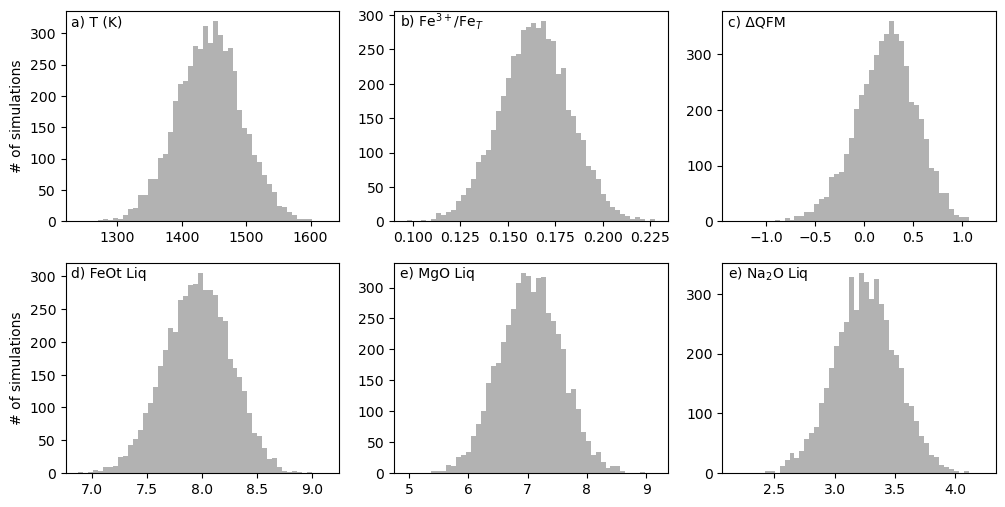

In [34]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6))
bins=50
ax1.hist(df_noisy_abs['T_K_Liq'].loc[Dupdf['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax2.hist(df_noisy_abs['Fe3Fet_Liq'].loc[Dupdf['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax4.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax5.hist(df_noisy_abs['MgO_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax6.hist(df_noisy_abs['Na2O_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax1.set_ylabel('# of simulations')
ax4.set_ylabel('# of simulations')
ax1.annotate("a) T (K)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax2.annotate("b) Fe$^{3+}$/Fe$_{T}$", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax3.annotate("c) ΔQFM", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax4.annotate("d) FeOt Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax5.annotate("e) MgO Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax6.annotate("e) Na$_2$O Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)

fig.savefig('MonteCarlo_Muth_input.png', dpi=200)

(array([  14.,   81.,  359.,  917., 1411., 1296.,  697.,  200.,   20.,
           5.]),
 array([6.87318155, 7.09920109, 7.32522064, 7.55124019, 7.77725974,
        8.00327928, 8.22929883, 8.45531838, 8.68133792, 8.90735747,
        9.13337702]),
 <BarContainer object of 10 artists>)

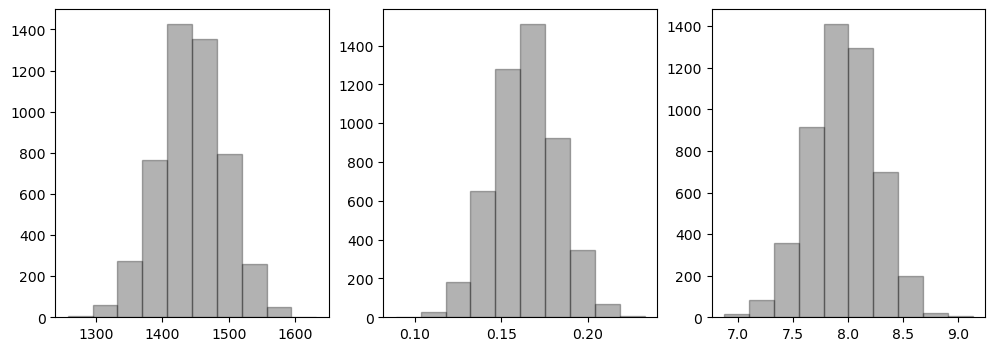

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.hist(Dupdf['T_K_MC'].loc[Dupdf['Sample_ID_Liq']==sam], ec='k', fc='black', alpha=0.3)
ax2.hist(Dupdf['Fe3Fet_Liq_MC'].loc[Dupdf['Sample_ID_Liq']==sam], ec='k', fc='black', alpha=0.3)
#ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID_Liq']==sam], ec='k', fc='black', alpha=0.3)
ax3.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam], ec='k', fc='black', alpha=0.3)

## Figure for text showing S6/St with errorbars
- Using reported

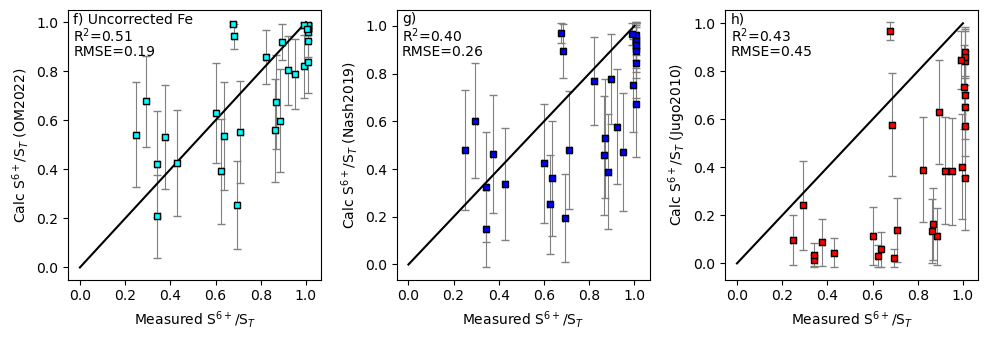

In [40]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6_Rep['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6_Rep['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6_Rep['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6_Rep['Mean_calc'], xy=False)
ax1.annotate('f) Uncorrected Fe', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('g)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('h)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs_TheirFe.png', dpi=200)

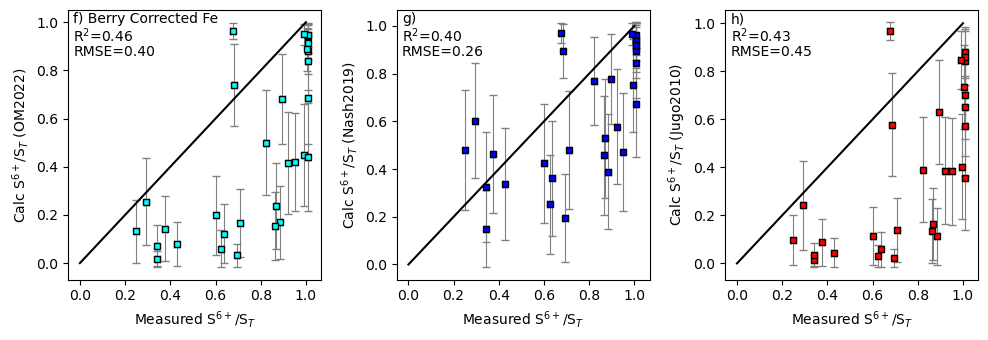

In [42]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6_Berry['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6_Berry['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6_Berry['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6_Berry['Mean_calc'], xy=False)
ax1.annotate('f) Berry Corrected Fe', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('g)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('h)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs_Berry.png', dpi=200)

In [24]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)

{'R2': '0.43',
 'RMSE': '0.45',
 'RMSE_num': 0.45,
 'P_val': '0.000',
 'Median': '-0.37',
 'Mean': '-0.38',
 'Int': array([-0.23649191]),
 'Grad': array([0.81139442])}

In [25]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)

{'R2': '0.40',
 'RMSE': '0.26',
 'RMSE_num': 0.26,
 'P_val': '0.000',
 'Median': '-0.11',
 'Mean': '-0.14',
 'Int': array([0.12543386]),
 'Grad': array([0.65168829])}

In [26]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6_Rep['Mean_calc'], xy=False)

{'R2': '0.51',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.04',
 'Int': array([0.20789131]),
 'Grad': array([0.67653364])}

## We can also do Monte Carlo simulations for the SCSS (and all other calculations)

### Lets make a monte carlo simulation for the sulfide composition, say error is +-0.05 Fe/Fe+Ni+Cu

In [27]:
df_out['FeFeNiCu']=0.634
FeFeNiCu_Err=ss.add_noise_series(df_out['FeFeNiCu'], error_var=0.05,
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
df_noisy_abs['FeFeNiCu_MC']=FeFeNiCu_Err

In [28]:
SCSS_S2017_MC=ss.calculate_S2017_SCSS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'], Fe_FeNiCu_Sulf=df_noisy_abs['FeFeNiCu_MC'],
                                   P_kbar=5)
                                   

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


### Now lets average these per sample

In [29]:
Stats_SCSS=pt.av_noise_samples_series(calc=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_SCSS.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,632.791265,628.465034,99.856522,1179.964202,291.367196
1,BBL-5-33,5000,686.612475,679.062157,108.804908,1157.189080,378.950111
2,BBL-5-34,5000,674.769703,669.303291,106.102421,1125.802125,365.854107
3,BBL-5-43,5000,721.976611,717.836005,109.039362,1247.248507,377.452183
4,BBL-5-44,5000,725.863209,719.838117,112.461105,1149.038988,391.995576


## Lets also calculate the SCAS

In [30]:
SCAS_ZT_MC=ss.calculate_ZT2022_SCAS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'],
                                   P_kbar=5)
                                   

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:126: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')


In [31]:
STot_MC=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT_MC['SCAS6_ppm'], S6St_Liq=noisy_ONeill_Fe_S6St['S6St_Liq'])
STot_MC.head()                              

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,742.831095,668.778295,74.052800,None,0.099690,668.778295,4667.688466,742.831095,46822.053180,74.052800,42154.364715
1,1202.613429,693.814757,508.798672,None,0.423077,693.814757,5550.225746,1202.613429,13118.697793,508.798672,7568.472048
2,1316.013873,816.290339,499.723534,None,0.379725,816.290339,5831.906748,1316.013873,15358.232432,499.723534,9526.325684
3,753.207099,595.520610,157.686489,None,0.209353,595.520610,4284.375539,753.207099,20464.797555,157.686489,16180.422016
4,1757.922978,771.556565,986.366413,None,0.561098,771.556565,5015.924518,1757.922978,8939.486228,986.366413,3923.561711


### Lets average this per sample

In [32]:
Stats_St=pt.av_noise_samples_series(calc=STot_MC['Total_S_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_St.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,939.723032,809.354215,458.837618,6829.059255,324.629297
1,BBL-5-33,5000,4159.531884,4212.506846,1799.782003,10853.649400,538.316259
2,BBL-5-34,5000,1894.558243,1457.746510,1319.429651,10593.878482,416.160690
3,BBL-5-43,5000,2114.071905,1597.793314,1499.059952,10977.754221,476.794370
4,BBL-5-44,5000,989.873838,877.730471,434.769157,7004.135066,401.542281


In [42]:
Stats_S6=pt.av_noise_samples_series(calc=STot_MC['SCAS_6_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_S6.head()
Stats_S2=pt.av_noise_samples_series(calc=STot_MC['SCSS_2_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_S2.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,632.791265,628.465034,99.856522,1179.964202,291.367196
1,BBL-5-33,5000,686.612475,679.062157,108.804908,1157.189080,378.950111
2,BBL-5-34,5000,674.769703,669.303291,106.102421,1125.802125,365.854107
3,BBL-5-43,5000,721.976611,717.836005,109.039362,1247.248507,377.452183
4,BBL-5-44,5000,725.863209,719.838117,112.461105,1149.038988,391.995576


## Lets calculate the STot using the measured S6/ST amount

In [43]:
df_out['S6St']=df_out['S6+/∑S']
df_out.loc[df_out['S6+/∑S']>1]=1
SCSS_S2017=ss.calculate_S2017_SCSS(df=df_out, T_K=Temp_3, Fe_FeNiCu_Sulf=0.634,
                                   P_kbar=5)
                                   

SCAS_ZT=ss.calculate_ZT2022_SCAS(df=df_out, T_K=Temp_3,
                                   P_kbar=5)
                                  
STot=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT['SCAS6_ppm'], S6St_Liq=df_out['S6+/∑S'])
STot.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:126: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  n

,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,2045.786001,625.153851,1420.632150,None,0.694419,625.153851,4364.741895,2045.786001,6285.460924,1420.632150,1920.719029
1,4840.565722,30.709456,4809.856266,None,0.993656,685.060485,4809.856266,107982.384252,4840.565722,107297.323767,30.709456
2,1076.254500,673.318103,402.936397,None,0.374388,673.318103,4977.354145,1076.254500,13294.653541,402.936397,8317.299396
3,955.162067,716.391457,238.770610,None,0.249979,716.391457,5478.824513,955.162067,21917.125172,238.770610,16438.300659
4,1093.450261,719.152091,374.298170,None,0.342309,719.152091,5359.471170,1093.450261,15656.809530,374.298170,10297.338360


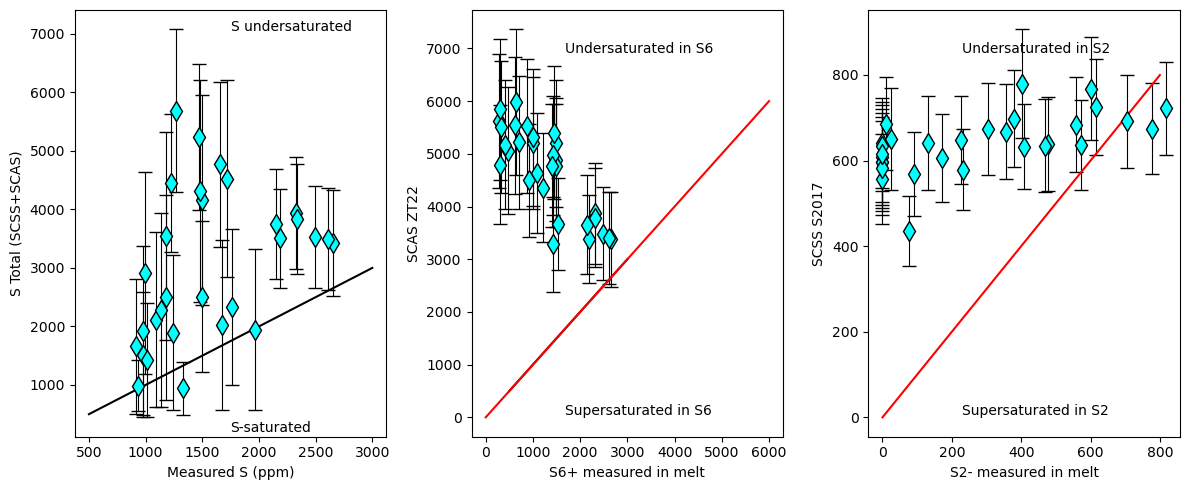

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))

ax1.errorbar(S_types['S_ppm'],
         Stats_St['Mean_calc'], xerr=0, yerr=Stats_St['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
ax1.plot([500, 3000], [500, 3000], '-k')
ax2.plot([500, 3000], [500, 3000], '-k')
ax1.set_xlabel('Measured S (ppm)')
ax1.set_ylabel('S Total (SCSS+SCAS)')


  
    
ax2.errorbar((df_out['S6+/∑S'])*S_types['S_ppm'],
         Stats_S6['Mean_calc'], xerr=0, yerr=Stats_S6['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
        

ax2.plot([0, 6000], [0, 6000], '-r')
ax2.set_xlabel('S6+ measured in melt')
ax2.set_ylabel('SCAS ZT22')

ax3.errorbar((1-(df_out['S6+/∑S']))*S_types['S_ppm'],
         Stats_S2['Mean_calc'], xerr=0, yerr=Stats_S2['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
 

ax3.plot([0, 800], [0, 800], '-r')
ax3.set_xlabel('S2- measured in melt')
ax3.set_ylabel('SCSS S2017')
ax1.annotate("S-saturated", xy=(0.5, 0.01), xycoords="axes fraction", fontsize=10)
ax1.annotate("S undersaturated", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=10)


ax2.annotate("Supersaturated in S6", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax2.annotate("Undersaturated in S6", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

ax3.annotate("Supersaturated in S2", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax3.annotate("Undersaturated in S2", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

fig.tight_layout()